In [1]:
import numpy as np
from rules_new import RuleNew, make_rule_good, initial_population, print_rule
from fitness_new import FitnessCalculator, movement_score, proximity_score, find_distance_grid, get_population_fitness
from genetic_new import genetic_algorithm
import matplotlib.pyplot as plt
from utility_func import int_to_coord

In [2]:
initial_pop = initial_population(100)
goal = (4, 4)

In [3]:
distance_grid = find_distance_grid(*goal)
print(distance_grid)

[[ 4  4  4  4  4  4  4  4  4  5  6  7  8  9 10]
 [ 4  3  3  3  3  3  3  3  4  5  6  7  8  9 10]
 [ 4  3  2  2  2  2  2  3  4  5  6  7  8  9 10]
 [ 4  3  2  1  1  1  2  3  4  5  6  7  8  9 10]
 [ 4  3  2  1  0  1  2  3  4  5  6  7  8  9 10]
 [ 4  3  2  1  1  1  2  3  4  5  6  7  8  9 10]
 [ 4  3  2  2  2  2  2  3  4  5  6  7  8  9 10]
 [ 4  3  3  3  3  3  3  3  4  5  6  7  8  9 10]
 [ 4  4  4  4  4  4  4  4  4  5  6  7  8  9 10]
 [ 5  5  5  5  5  5  5  5  5  5  6  7  8  9 10]
 [ 6  6  6  6  6  6  6  6  6  6  6  7  8  9 10]
 [ 7  7  7  7  7  7  7  7  7  7  7  7  8  9 10]
 [ 8  8  8  8  8  8  8  8  8  8  8  8  8  9 10]
 [ 9  9  9  9  9  9  9  9  9  9  9  9  9  9 10]
 [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10]]


In [5]:
proximity_score = lambda distance: 1/distance
fitness_calculator = FitnessCalculator(movement_score, proximity_score, distance_grid)

In [6]:
fitness_list = get_population_fitness(initial_pop, fitness_calculator)
fitness_list = np.array(fitness_list)
print(np.sum(fitness_list))

-705.8253968253969


In [7]:
fitness_list = fitness_list - np.min(fitness_list)
new_population, new_fitness, sum_fitnesses = genetic_algorithm(distance_grid=distance_grid,
                                                population=initial_pop,
                                                fitness_calculator=fitness_calculator,
                                                fitness_list=fitness_list,
                                                chance_for_mutation=0.0,
                                                n_iterations=200,
                                                n_rules=100)

print(sum_fitnesses)

100%|██████████| 200/200 [00:52<00:00,  3.82it/s]

[-126.65793651  -13.40515873  155.38055556  259.58095238  395.9968254
  495.93928571  683.63730159  857.60357143  913.71349206  989.27142857
 1117.91071429 1165.26865079 1207.70634921 1275.41666667 1342.92936508
 1366.61388889 1408.80039683 1457.44444444 1488.31984127 1576.04722222
 1656.73769841 1714.22698413 1742.33809524 1815.1468254  1798.8297619
 1826.91706349 1820.95634921 1879.26587302 1902.21349206 1908.34285714
 1940.13095238 1983.78611111 2033.76507937 2077.09365079 2114.17936508
 2152.77857143 2176.23531746 2179.0281746  2240.83015873 2257.43492063
 2295.2702381  2315.99880952 2356.74880952 2382.44007937 2371.93769841
 2424.11190476 2473.09285714 2486.34007937 2502.91666667 2461.51706349
 2494.23730159 2495.40238095 2468.63650794 2482.14047619 2488.72063492
 2516.52261905 2564.55634921 2568.69761905 2561.54960317 2569.39246032
 2588.33412698 2610.35277778 2657.35396825 2681.07579365 2711.00515873
 2711.47896825 2682.86825397 2681.82619048 2675.83928571 2693.375
 2707.6615079

In [8]:
print(new_fitness)

[33.97142857 33.11031746 31.73571429 32.16190476 33.73253968 33.34365079
 32.46190476 33.75753968 32.63690476 32.8547619  33.62142857 33.39920635
 32.45357143 32.54801587 32.88968254 32.83809524 32.34007937 32.13253968
 32.81746032 32.44642857 32.44126984 32.48571429 33.99365079 32.64404762
 33.48293651 31.62420635 32.79642857 32.10793651 33.23968254 33.47857143
 32.63015873 33.54920635 33.23253968 33.74365079 33.3547619  32.03134921
 32.71746032 32.7218254  33.4547619  32.5452381  33.7452381  33.72142857
 33.0047619  32.42142857 32.09087302 32.04404762 32.83253968 32.83253968
 33.61031746 32.18571429 33.49365079 31.89246032 32.70079365 33.21468254
 32.46785714 33.02142857 32.71587302 32.82420635 33.46468254 33.01349206
 32.85753968 33.33253968 31.1797619  32.57460317 32.40753968 32.03253968
 33.3468254  31.79007937 32.53253968 33.15753968 32.90753968 32.58015873
 31.83293651 33.04365079 32.3547619  32.24285714 32.64642857 33.53412698
 32.6218254  32.61031746 32.82857143 33.52420635 32

In [9]:
new_fitness=np.array(new_fitness)
ind = np.argmax(new_fitness)
best_rule = new_population[ind]
print_rule(best_rule)

↘ ↓ ↓ ↙ ↙ ↘ ↓ → ↓ ↙ ↘ ↙ ← ↙ ← 
↗ ↘ ↓ ↙ ↓ ↘ ↘ ← ↓ ↖ ↘ ← ↖ ↓ ↑ 
↘ → ↓ ↓ ← ↙ ↙ ↙ ↙ ↓ ↘ ↖ ↘ ↓ ← 
↘ ↗ → ↘ ↓ ↙ ← ↖ ↙ ↖ → → ↘ ↓ ↓ 
→ → ↓ → ↗ ← ← ↖ ← ↑ ← ↘ ↙ ↓ ← 
→ ↓ ↗ ↗ ↑ ↖ ← ↗ ↙ ↙ ↓ ← ↗ ↑ ↖ 
→ ↑ ← ↑ ↑ ↖ ↖ ← ↙ ↑ ↖ ↖ → ↓ ↖ 
→ ↗ ↑ ↑ ↑ ↗ ↖ ↖ ↖ ↖ ← ↙ ↖ ← ↖ 
↗ ↑ ↘ ↑ ↗ ← → ↑ ↖ ← ← ← ↙ ← ← 
↑ ↗ ↑ ↓ ↖ ↗ ↖ ↑ ↓ ↖ ↑ → ↘ ↓ ↓ 
↑ ↙ ↖ ← ↙ → ↑ ↖ → ← ↘ → ↖ ↖ ← 
↑ ↖ ↘ ↗ ↖ ← ↖ ← ↑ ↑ ↑ ↖ ↘ ↖ ↓ 
↑ ↖ → ↗ ↖ ↖ ↗ ↑ ↑ ↖ ↓ ↘ ↗ ↙ ← 
↓ ↑ ↑ ↖ ↗ ↑ ↖ ↓ ↑ ← ↗ ↗ → ↖ ← 
↗ ↗ ↑ → ↖ ↗ → ↑ ↖ ↖ ↗ ↗ ↗ ↖ ← 


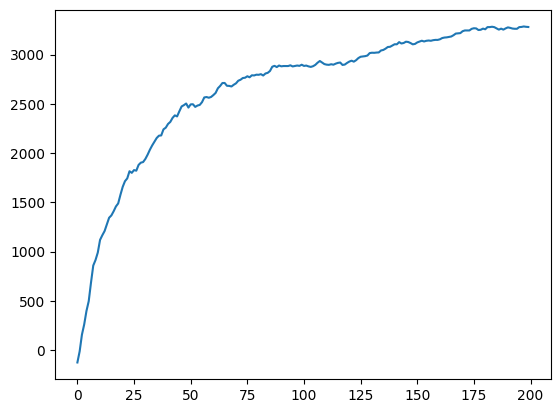

In [10]:
plt.plot(sum_fitnesses)

In [27]:
# now we chose an initial position and follow best rule

position = (9,2)
while position!=goal:
    movement=best_rule.get_movement(*position)
    print(movement)
    step = int_to_coord(movement)
    new_position=
    break

2
